# Kaggle Competition - Music Genre Classification 
________________________________________________________


In [2]:
# Load Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import ydata_profiling
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2


from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV  #hyperparameter tuning


## Exploratory Data Analysis (EDA) 

In [4]:
#Load Data 

#directory = ("C:\\Users\\matlo\\OneDrive\\2024 Victoria University of Wellington\\Trimester 2\\AIML421 ML Tools and Techniques\\Assignments\\Assignment 3\\training-data" )
directory =("H:\\training-data")

# Order of the files:
# alternative, blues, classical, comedy, folk, hip hop, jazz, opera, pop, rnb 

In [5]:
# store Data frames
dataframes_list = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        temp_df = pd.read_csv(file_path)
        dataframes_list.append(temp_df)

# merge the df's
df = pd.concat(dataframes_list, ignore_index=True)

df.tail()


,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre
49995,46447,Tobi Lou,"Lavender Town, Pt. 1 (feat. DJ Pharris)",4Z2BMWlk7adX79uG1Fi2Ak,43,0.09780,0.823,188108,0.619,0.000000,C#,0.0929,-9.820,Major,0.2110,147.985,04-Apr,0.163,R&B
49996,211174,Bruno Major,Easily,7B1GW9WZj5oTCCZ0X2SAbv,73,0.49100,0.772,-1,0.256,0.006120,G,0.1440,-8.545,Minor,0.0481,118.902,03-Apr,0.357,R&B
49997,105822,Marsha Ambrosius,Late Nights & Early Mornings,6Y1V1Lt0Zfrj2p4JW38boo,43,0.32400,0.638,207680,0.761,0.000000,G#,0.0624,-6.455,Major,0.3020,130.213,04-Apr,0.457,R&B
49998,56385,empty_field,TOMBOY,4cA6e3U7mtJfAOq3dWNAUZ,52,0.09610,0.300,241692,0.431,0.000012,D#,0.1140,-5.314,Major,0.0299,148.317,04-Apr,0.221,R&B
49999,108923,Chris Brown,Ya Man Ain't Me,3JD3Mtjo7c05NZNDCPXh37,47,0.00351,0.809,-1,0.565,0.000000,A#,0.3420,-5.995,Major,0.0387,124.119,04-Apr,0.709,R&B


In [6]:
df['time_signature'] = df['time_signature'].str.replace(r'(\d+)-\w+', r'\1/4', regex=True)  ## fix the time signature format

# Check the result
df.head()

,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre
0,134768,Freddie Gibbs,Triple Threat,12NwYmQT1Mm7gkrCjIuq0d,45,0.02520,0.850,178422,0.412,0.00000,D,0.0948,-7.845,Major,0.2360,130.99,04/4,0.663,Alternative
1,97297,Three Days Grace,No More,4yDs61mzPcTod9qrBUE3H9,45,0.00261,0.271,225493,0.916,0.00000,F#,0.1560,-3.141,Minor,0.0581,197.817,04/4,0.286,Alternative
2,88412,Solange,Don't You Wait,0AmkrjMDff4ICVNxQhppZA,45,0.27900,0.833,245907,0.579,0.69200,C,0.0997,-6.568,Major,0.0800,?,04/4,0.514,Alternative
3,172572,Amy Grant,"Baby, Baby",25AmLrQC1b3Hz9FUGZXF1S,58,0.42600,0.702,236973,0.901,0.00153,C#,0.0368,-4.450,Major,0.0264,97.862,04/4,0.919,Alternative
4,194415,empty_field,Livin Right,6KmnejQFYdWUVUJh6zwEce,46,0.00114,0.539,209760,0.915,0.00000,C#,0.0675,-4.251,Minor,0.0601,88.051,04/4,0.435,Alternative


In [7]:
df['time_signature'].unique()  # Checking the number of unique categories under time signature. There are 5 

array(['04/4', '03/4', '01/4', '05/4', '0/4'], dtype=object)

In [8]:
df['genre'].unique() 

array(['Alternative', 'Blues', 'Classical', 'Comedy', 'Folk', 'Hip-Hop',
       'Jazz', 'Opera', 'Pop', 'R&B'], dtype=object)

In [9]:
# Explore the data types

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  int64  
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   track_id          50000 non-null  object 
 4   popularity        50000 non-null  int64  
 5   acousticness      50000 non-null  float64
 6   danceability      50000 non-null  float64
 7   duration_ms       50000 non-null  int64  
 8   energy            50000 non-null  float64
 9   instrumentalness  50000 non-null  float64
 10  key               50000 non-null  object 
 11  liveness          50000 non-null  float64
 12  loudness          50000 non-null  float64
 13  mode              50000 non-null  object 
 14  speechiness       50000 non-null  float64
 15  tempo             50000 non-null  object 
 16  time_signature    50000 non-null  object

In [10]:
# distribution 

df.describe ()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.00000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,118922.89754,41.670020,0.474821,0.533403,1.960065e+05,0.515805,0.149052,0.244182,-11.013448,0.166576,0.419746
std,57198.25002,18.496416,0.376703,0.188077,1.566169e+05,0.273039,0.300495,0.234041,6.706273,0.255489,0.248419
min,20004.00000,0.000000,0.000001,0.058200,-1.000000e+00,0.000243,0.000000,0.009670,-47.599000,0.022600,0.000000
25%,69247.75000,29.000000,0.080100,0.406000,1.187925e+05,0.296000,0.000000,0.099600,-14.150000,0.038200,0.210000
50%,118822.50000,44.000000,0.442000,0.546000,2.044335e+05,0.543000,0.000066,0.133000,-8.906000,0.052200,0.400000
75%,168614.25000,55.000000,0.867000,0.672000,2.593330e+05,0.735000,0.046800,0.299000,-6.161000,0.141000,0.607000
max,217850.00000,99.000000,0.996000,0.980000,5.552917e+06,0.998000,0.994000,1.000000,3.744000,0.965000,0.986000


In [11]:
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')  #tempo is numerical but refelcts object. convert this


In [12]:
#Investigate and visualise Distribution 

numerical_features = [ 'popularity', 'acousticness', 'danceability', 'duration_ms', 
                      'energy', 'instrumentalness', 'liveness', 'loudness', 
                      'speechiness', 'tempo', 'valence']


In [13]:
df.replace('?', float('nan'), inplace=True)    # correction of the value error when plotting heatmap 
df[numerical_features] = df[numerical_features].apply(pd.to_numeric, errors='coerce')

In [14]:
# Search for Duplicates 
df.duplicated().sum()     # no duplicates in the data set 

0

In [15]:
# check for missing values 
df.isnull().sum()


instance_id            0
artist_name            0
track_name             0
track_id               0
popularity             0
acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                   0
speechiness            0
tempo               7501
time_signature         0
valence                0
genre                  0
dtype: int64

In [16]:
 (df['tempo'].isnull().sum()/ len(df))*100   # Check how much data in tempo is missing data 

15.001999999999999

In [17]:
# imputation of tempo

# imputet the missing values in the tempo column with the mean value
df['tempo'] = df['tempo'].fillna(df['tempo'].mean())

**note:** 
This imputation is done using numpy and is not fitted and transformed, therefore will not cause any 
data leakages as the target is not involved in the imputation/ filling missing values. It is also necessary to note that it was necessary to be done
in order to perfrom a log transformation in feature engineering. Hence imputation done using statistics and also done before splitting. 

In [19]:
## Visualize relationship between features
#sns.pairplot(df)

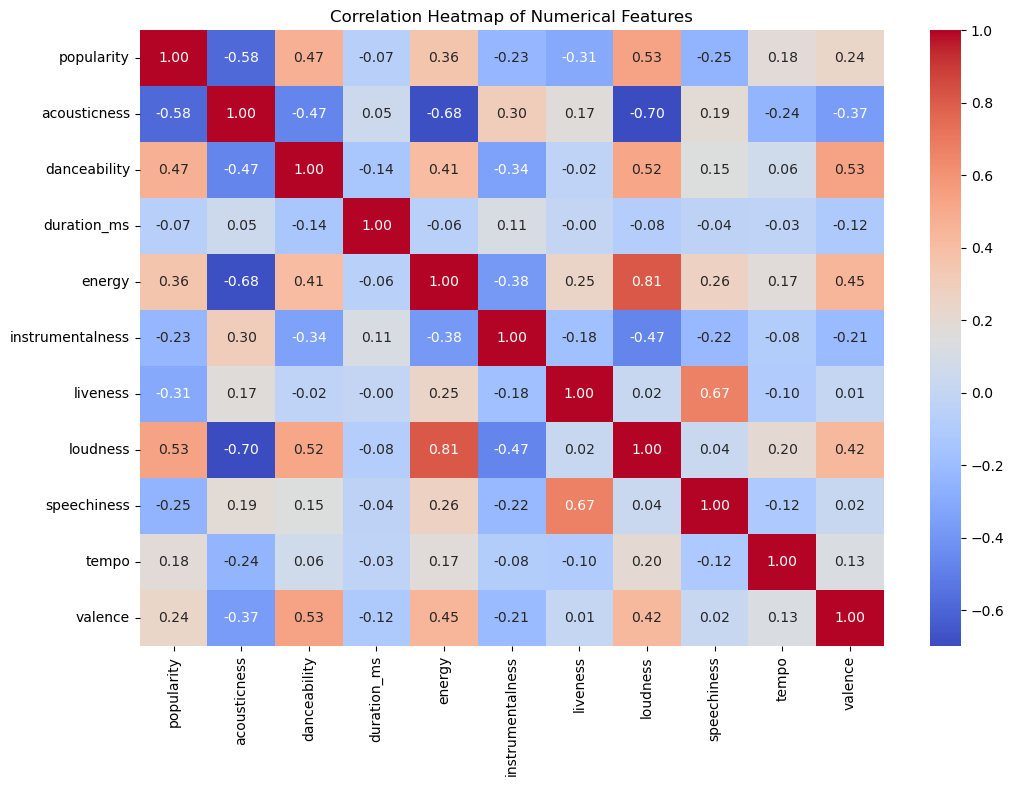

In [20]:
# correlation of features 

# Visualise correlations 

plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### univariate analysis 

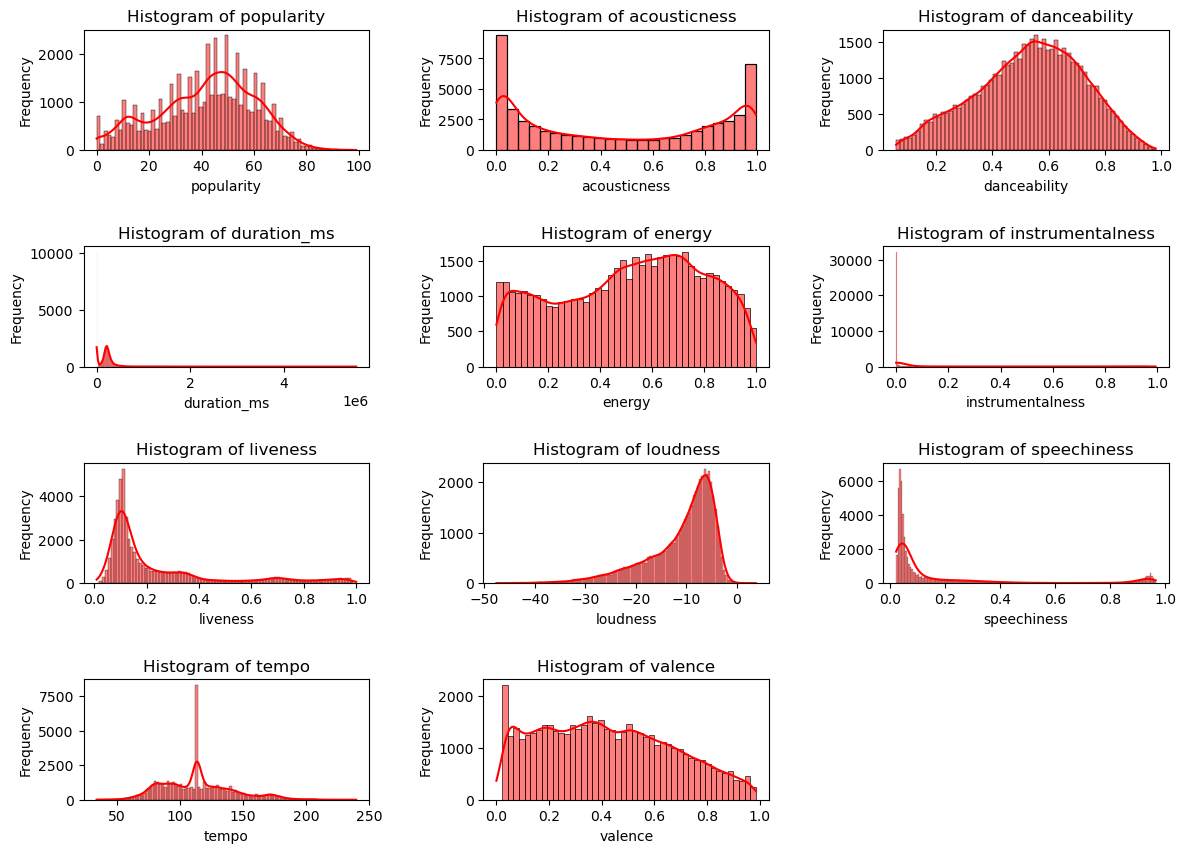

In [22]:
#distributions of numerical values

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features,1):
    plt.subplot(4,3, i)
    sns.histplot(df[feature],  bins= 'auto', kde=True, color='red')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.subplots_adjust(hspace=0.8, wspace=0.4)

plt.show()

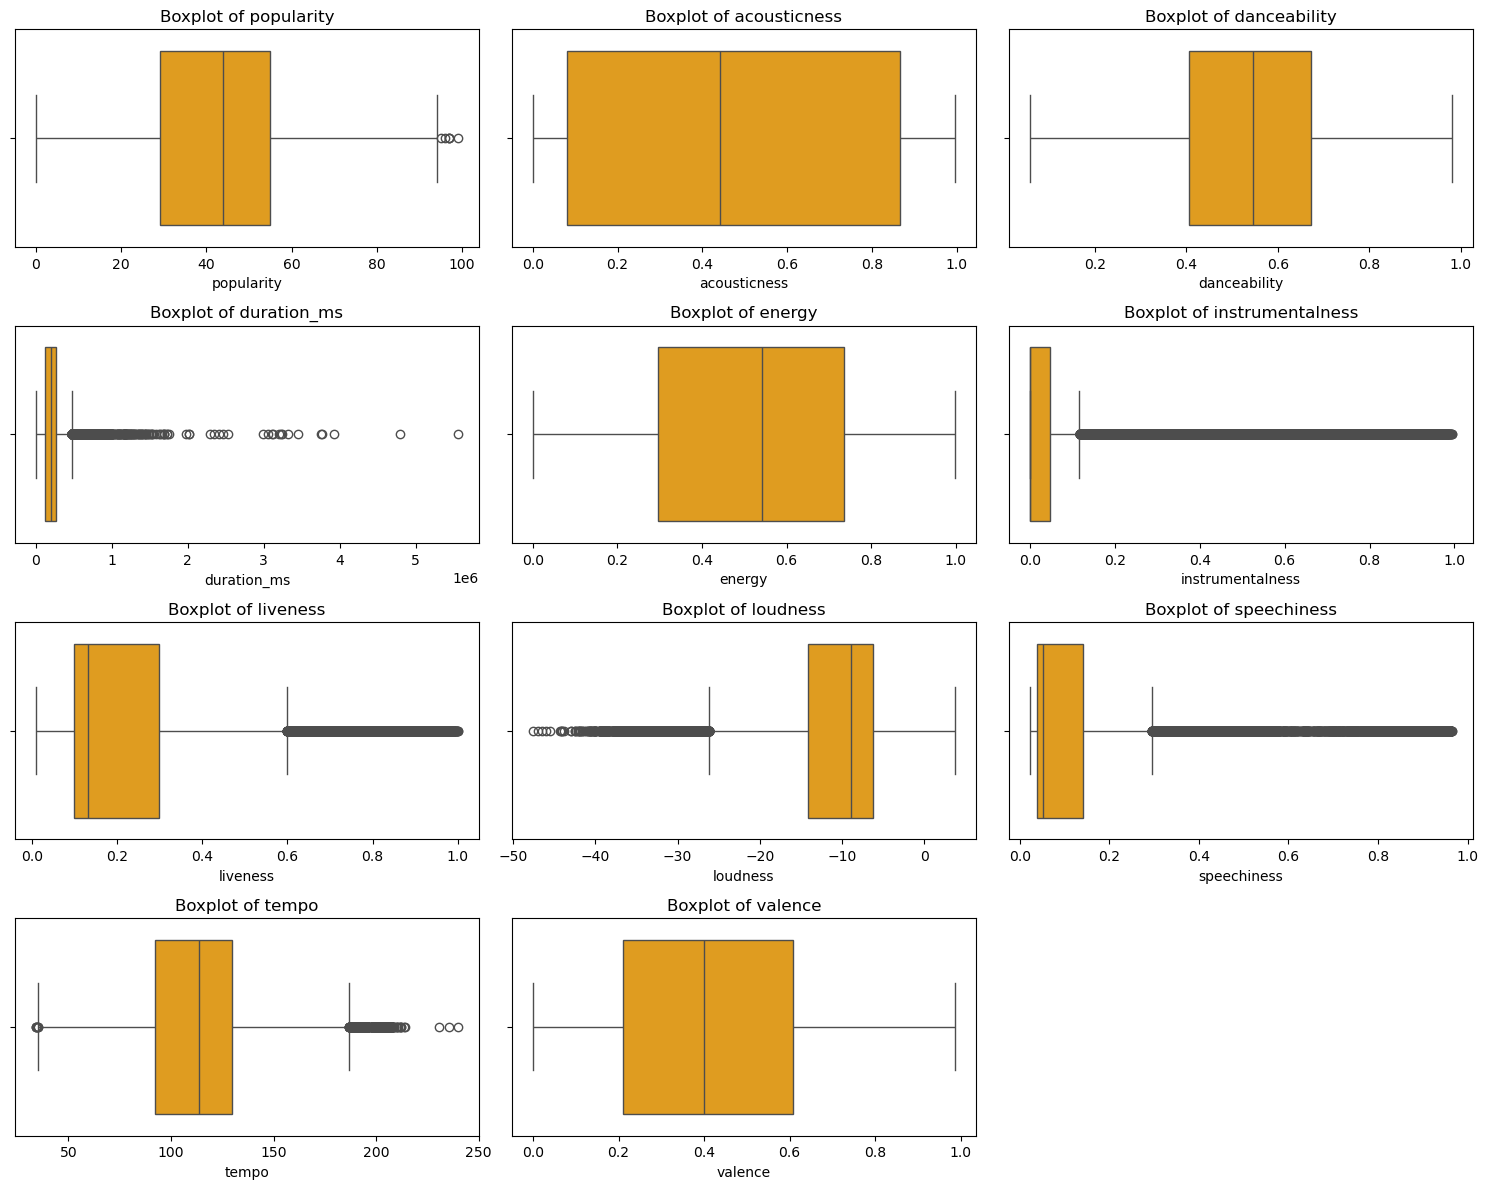

In [23]:
## Investigate outliers in the dataset

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x=col, color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [24]:
df[numerical_features].shape  ## Check the size of the data with outliers 

(50000, 11)

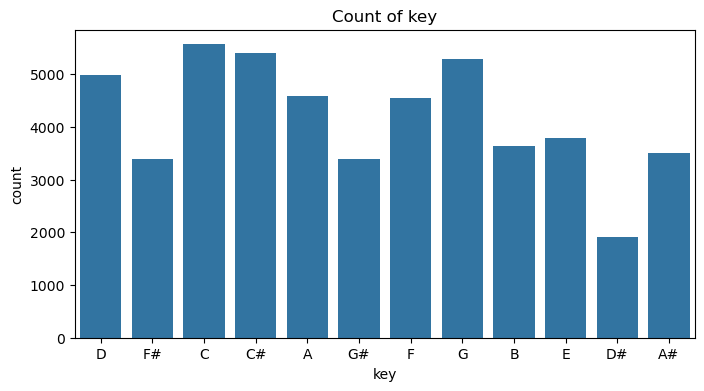

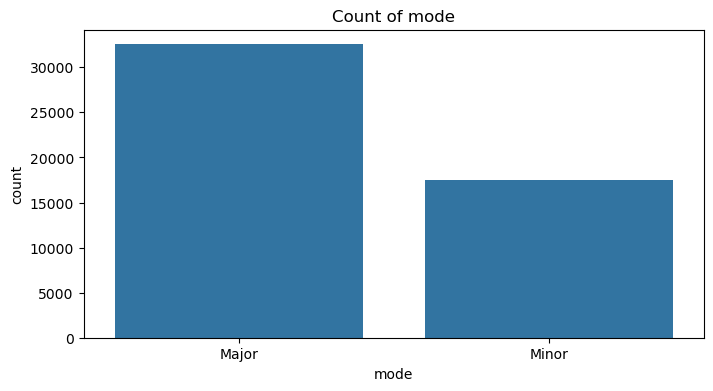

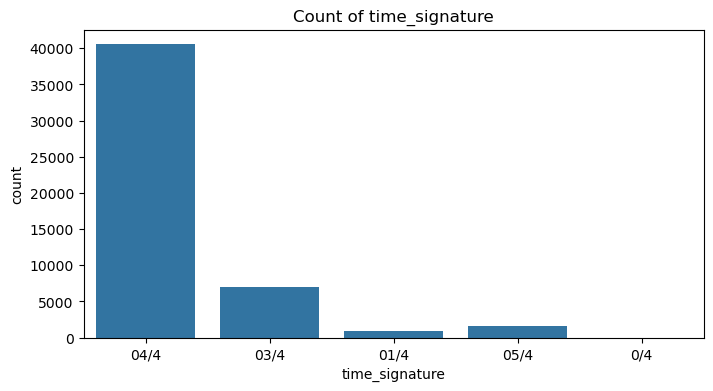

In [25]:
## Create count plots tp evaluate the  balance of classes in categorical data 

categorical_columns = ['key', 'mode', 'time_signature']
for feature in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of {feature}')
    plt.show()

In [26]:
# Visualizations 

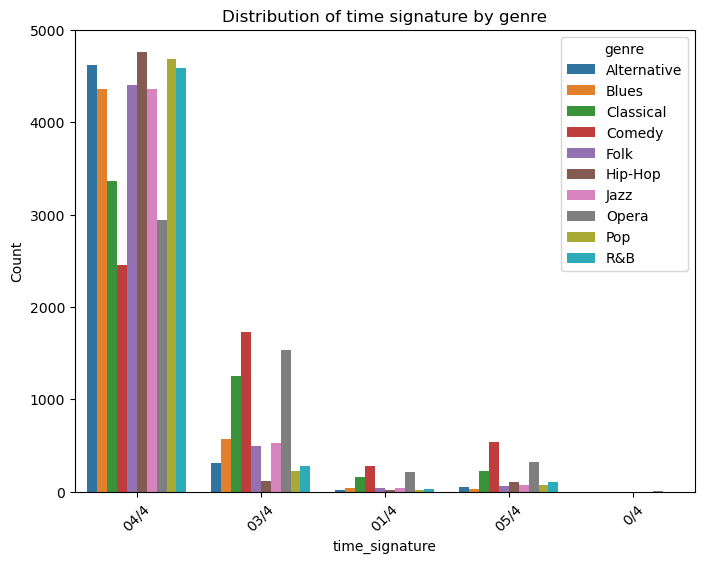

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='time_signature', hue='genre')
plt.title('Distribution of time signature by genre')
plt.xlabel('time_signature')
plt.ylabel('Count')
plt.legend(title='genre', labels=['Alternative', 'Blues', 'Classical', 'Comedy', 'Folk', 'Hip-Hop',
       'Jazz', 'Opera', 'Pop', 'R&B'])

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

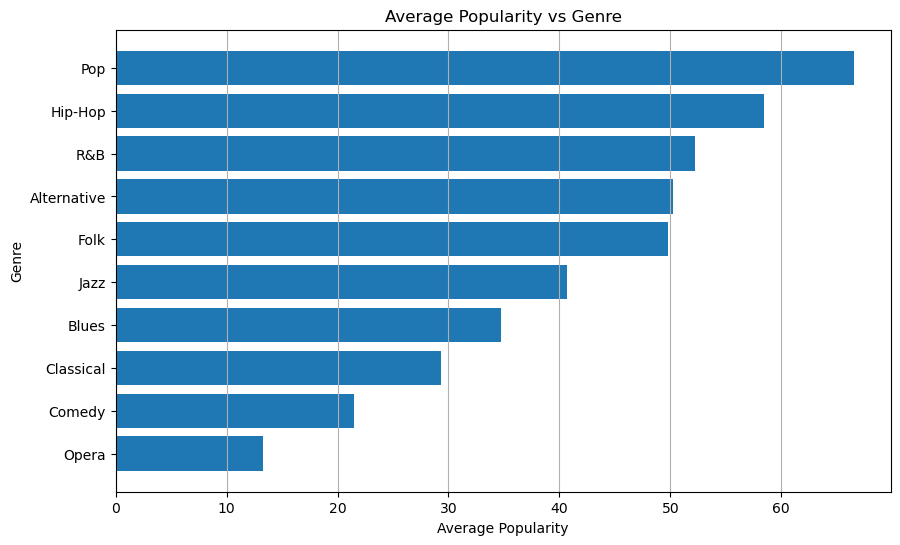

In [28]:

grouped_data = df.groupby('genre')['popularity'].mean() # Group by 'genre' and calculate the mean popularity for each genre

grouped_data = grouped_data.sort_values() # for visual purposes

## Bar plot
plt.figure(figsize=(10, 6))
plt.barh(grouped_data.index, grouped_data.values)

# label
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.title('Average Popularity vs Genre')
plt.grid(True, axis='x')  # Add grid on the x-axis

plt.show()

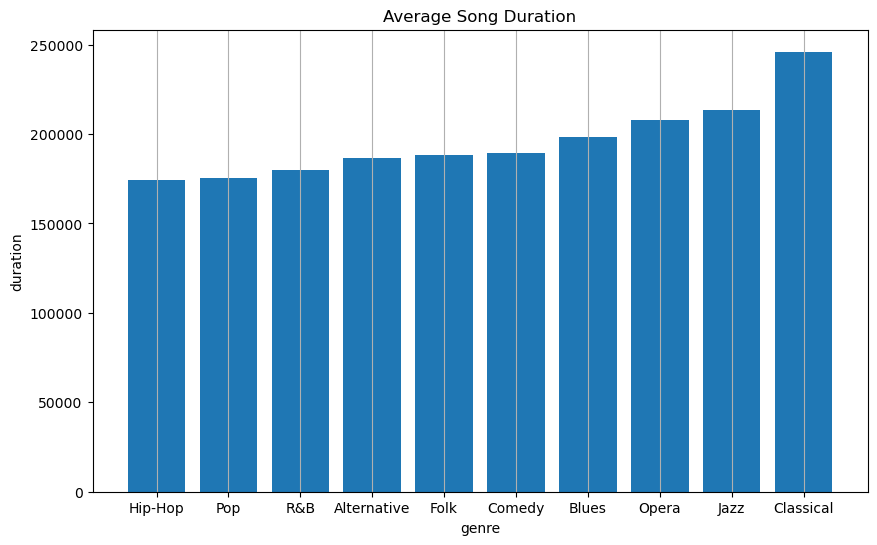

In [29]:

grouped_data = df.groupby('genre')['duration_ms'].mean() # Group by 'duration' and calculate the mean popularity for each genre

grouped_data = grouped_data.sort_values() # for visual purposes

## Bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values)

# label
plt.xlabel('genre')
plt.ylabel('duration')
plt.title('Average Song Duration')
plt.grid(True, axis='x')  

plt.show()

### Handling Outliers

In [31]:
# Define the columns with outliers

# feature_outliers = ['popularity', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo' ]

#### Using the boxplots to define the bounds for outlier removal:
#lower_bounds = {
#    'popularity': 0,
#    'duration_ms': 0,
#    'instrumentalness': 0,
#    'liveness': 0,
#    'loudness': -28,
#    'speechiness': 0,
#    'tempo': 25
#}

#upper_bounds = {
#    'popularity': 95,
#    'duration_ms': (0.5e6),
#    'instrumentalness': 0.18,
#    'liveness': 0.6,
#    'loudness': 5,
#    'speechiness': 0.3,
#    'tempo': 200
#}

#### Remove rows with outliers
#for feature in feature_outliers:
#    df = df[(df[feature] >= lower_bounds[feature]) & (df[feature] <= upper_bounds[feature])]

# Now df contains data with outliers removed

### **Note:**

In [33]:
# df[feature_outliers].shape  

# I have discovered that removing outliers based on the boxplot distribution gives a dataset shape of (20676,7), 
## which is removing almost half of the dataset. This can be detrimental for our ML model down the line, thus I will avoid outlier removal to preserve data 
### and rather apply feature engineering that may minimize the effects of outliers for the ML model. 

**Note:** 

To check the statistical importance of the fetaures in classifying the genre, explore the ANOVA and Chi squared methods for insight about the feature: 

In [35]:
#### ANOVA F test for numerical features 

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['genre'])

#F test
f_values, p_values = f_classif(df[numerical_features], y_encoded)

# Display F-values and p-values
anova_df = pd.DataFrame({'Feature': numerical_features, 'F-Value': f_values, 'p-value': p_values})
print(anova_df.sort_values(by='F-Value', ascending=False))

             Feature       F-Value        p-value
8        speechiness  28041.659325   0.000000e+00
0         popularity  16655.502737   0.000000e+00
7           loudness   7316.990756   0.000000e+00
1       acousticness   6906.102316   0.000000e+00
2       danceability   5242.466867   0.000000e+00
6           liveness   5042.542077   0.000000e+00
4             energy   4818.541454   0.000000e+00
5   instrumentalness   3403.510861   0.000000e+00
10           valence   1574.736254   0.000000e+00
9              tempo    386.352395   0.000000e+00
3        duration_ms     98.539963  1.924253e-183


**Note:**

All numerical features have low p values (all less than 0.05) and are therfore statistically significant to 
predicting the genre of the music

The greatest f- value (  top 3 ) , is the speechiness, popularity and the loudness. This means that these variables strongly contribute
in explaining the varaince in the music genre.. It may also be imprtant to note that the duration of the song is the feature which least represent the variance on the genre, thus may  be least impoortant and can be dropped.

In [37]:
categorical_columns = [ 'key', 'mode', 'time_signature']  


In [38]:
## For Categorical data, use the chi2 test, this is good to  identifies features that are likely to be
#independent of the output class- referenced for Wk 6b Lecture notes

X_cat = pd.get_dummies(df[categorical_columns], drop_first=True)
# chi2 test
chi2_scores, p_values = chi2(X_cat, y_encoded)

# Display chi-squared scores and p-values
chi2_df = pd.DataFrame({'Feature': X_cat.columns, 'Chi2 Score': chi2_scores, 'p-value': p_values})
print(chi2_df.sort_values(by='Chi2 Score', ascending=False))

                Feature   Chi2 Score        p-value
13  time_signature_03/4  4343.398463   0.000000e+00
14  time_signature_04/4  1506.710431   0.000000e+00
15  time_signature_05/4  1455.384030  8.329840e-308
11           mode_Minor  1079.509853  1.222581e-226
12  time_signature_01/4   974.992933  4.249652e-204
3                key_C#   794.231368  3.708942e-165
8                key_F#   432.604493   1.497093e-87
5                key_D#   325.401261   1.055887e-64
2                 key_C   216.375135   1.210206e-41
9                 key_G   216.016610   1.439510e-41
1                 key_B   178.944994   8.413691e-34
0                key_A#   178.458750   1.062880e-33
10               key_G#   160.454653   5.974749e-30
4                 key_D   151.111756   5.189291e-28
7                 key_F   133.916300   1.853803e-24
6                 key_E   131.105402   7.025781e-24


**Notes:**
  

time signature 3/4; Mode_minor and C# key have the highest variance contribution to the genre, respectively in their categories. 

In [40]:
df.head()

,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre
0,134768,Freddie Gibbs,Triple Threat,12NwYmQT1Mm7gkrCjIuq0d,45,0.02520,0.850,178422,0.412,0.00000,D,0.0948,-7.845,Major,0.2360,130.99000,04/4,0.663,Alternative
1,97297,Three Days Grace,No More,4yDs61mzPcTod9qrBUE3H9,45,0.00261,0.271,225493,0.916,0.00000,F#,0.1560,-3.141,Minor,0.0581,197.81700,04/4,0.286,Alternative
2,88412,Solange,Don't You Wait,0AmkrjMDff4ICVNxQhppZA,45,0.27900,0.833,245907,0.579,0.69200,C,0.0997,-6.568,Major,0.0800,113.68117,04/4,0.514,Alternative
3,172572,Amy Grant,"Baby, Baby",25AmLrQC1b3Hz9FUGZXF1S,58,0.42600,0.702,236973,0.901,0.00153,C#,0.0368,-4.450,Major,0.0264,97.86200,04/4,0.919,Alternative
4,194415,empty_field,Livin Right,6KmnejQFYdWUVUJh6zwEce,46,0.00114,0.539,209760,0.915,0.00000,C#,0.0675,-4.251,Minor,0.0601,88.05100,04/4,0.435,Alternative


## Preprocessing and Feature Engineering

In [42]:
# Creating new features based on their interaction i.e from pyplot visualizations
## these features a potential of complex patterns 

df['loudness_energy_ratio'] = df['loudness'] / df['energy']

##################################REMOVE #######################

# log transformation for skewness in some features to tone down the effects of outliers as mentioned priorr 

df['instrumentalness_log'] = np.log1p(df['instrumentalness']) 
df['liveness_log'] = np.log1p(df['liveness']) 
df['speechiness_log'] = np.log1p(df['speechiness']) 
df['tempo_log'] = np.log1p(df['tempo']) 


########################### REMOVE  #############################

##  High Cardinality in Categorical Features

#The artist names are unique inputs and can overwhelm model and using one hot encoding will introduce a very large amount of features. 
## Therefore use frequency coding 

#df['artist_name_freq'] = df['artist_name'].map(df['artist_name'].value_counts())   #reference: ChatGpt: how to deal with feature engineering artist name, with many unique inputs

In [45]:
df.head()

,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre,loudness_energy_ratio
0,134768,Freddie Gibbs,Triple Threat,12NwYmQT1Mm7gkrCjIuq0d,45,0.02520,0.850,178422,0.412,0.00000,D,0.0948,-7.845,Major,0.2360,130.99000,04/4,0.663,Alternative,-19.041262
1,97297,Three Days Grace,No More,4yDs61mzPcTod9qrBUE3H9,45,0.00261,0.271,225493,0.916,0.00000,F#,0.1560,-3.141,Minor,0.0581,197.81700,04/4,0.286,Alternative,-3.429039
2,88412,Solange,Don't You Wait,0AmkrjMDff4ICVNxQhppZA,45,0.27900,0.833,245907,0.579,0.69200,C,0.0997,-6.568,Major,0.0800,113.68117,04/4,0.514,Alternative,-11.343696
3,172572,Amy Grant,"Baby, Baby",25AmLrQC1b3Hz9FUGZXF1S,58,0.42600,0.702,236973,0.901,0.00153,C#,0.0368,-4.450,Major,0.0264,97.86200,04/4,0.919,Alternative,-4.938957
4,194415,empty_field,Livin Right,6KmnejQFYdWUVUJh6zwEce,46,0.00114,0.539,209760,0.915,0.00000,C#,0.0675,-4.251,Minor,0.0601,88.05100,04/4,0.435,Alternative,-4.645902


In [46]:
## Drop the original features to prevent redundancy 

df.drop(columns = ['artist_name','energy', 
                    'loudness', 
                    'track_id',             ### Remove track id and track_name  these are high in uniqueness and less likly to explain the varianc in the genre
                    'track_name',
                    'duration_ms'], inplace = True)   # Remove duration_ms as noted from ANOVA,it score very poorly on F-test and least likely to explain variance in target variale

In [47]:
### Encode categorical features
categorical_columns = [ 'key', 'mode', 'time_signature']  

# One-hot encode categorical columns
df= pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df = df.astype({col: int for col in df.select_dtypes(include=['bool']).columns})


In [48]:
X = df.drop(columns=['genre']) 
y = df['genre']  # Target variable

### Save to CSV

In [50]:
df.to_csv('trained_cleaned_data.csv', index=False)

## Data Split 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
### Encode target variable
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [54]:
X.head()

,instance_id,popularity,acousticness,danceability,instrumentalness,liveness,speechiness,tempo,valence,loudness_energy_ratio,...,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,time_signature_01/4,time_signature_03/4,time_signature_04/4,time_signature_05/4
0,134768,45,0.02520,0.850,0.00000,0.0948,0.2360,130.99000,0.663,-19.041262,...,0,0,0,0,0,0,0,0,1,0
1,97297,45,0.00261,0.271,0.00000,0.1560,0.0581,197.81700,0.286,-3.429039,...,0,0,1,0,0,1,0,0,1,0
2,88412,45,0.27900,0.833,0.69200,0.0997,0.0800,113.68117,0.514,-11.343696,...,0,0,0,0,0,0,0,0,1,0
3,172572,58,0.42600,0.702,0.00153,0.0368,0.0264,97.86200,0.919,-4.938957,...,0,0,0,0,0,0,0,0,1,0
4,194415,46,0.00114,0.539,0.00000,0.0675,0.0601,88.05100,0.435,-4.645902,...,0,0,0,0,0,1,0,0,1,0


In [55]:
y.head()

0    Alternative
1    Alternative
2    Alternative
3    Alternative
4    Alternative
Name: genre, dtype: object

In [56]:
## Scale

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#########################  REMOVED ###########################


pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

######### Check explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

import seaborn as sns

########## Assuming X_train_pca contains the PCA-transformed data (first two components)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 4], hue=y_train, palette='viridis', s=60)
plt.title('PCA Scatter Plot (First 2 Components)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# Machine Learning Models

In [59]:
#!pip install xgboost

In [60]:
from xgboost import XGBClassifier     #Hyperparameters that have been tuned by optuna tuning  

xgb = XGBClassifier(   n_estimators=236,
    max_depth=5,
    learning_rate=0.05596095777836209,
    subsample=0.6679548988683811,
    colsample_bytree=0.8984211763812973)
xgb.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8984211763812973, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05596095777836209,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=236, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [61]:
y_pred = xgb.predict(X_test_scaled)              # with pca: 0.45 without pca: 0.67  After HP tunign: accuracy remains the same at 0.67
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy  xgb: {accuracy:.2f}")

Accuracy  xgb: 0.65


# Model Evaluation

## Cross Validation

In [64]:
from xgboost import XGBClassifier

clf = XGBClassifier()
scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f'XGBoost Mean Accuracy: {scores.mean():.2f}')


XGBoost Mean Accuracy: 0.64


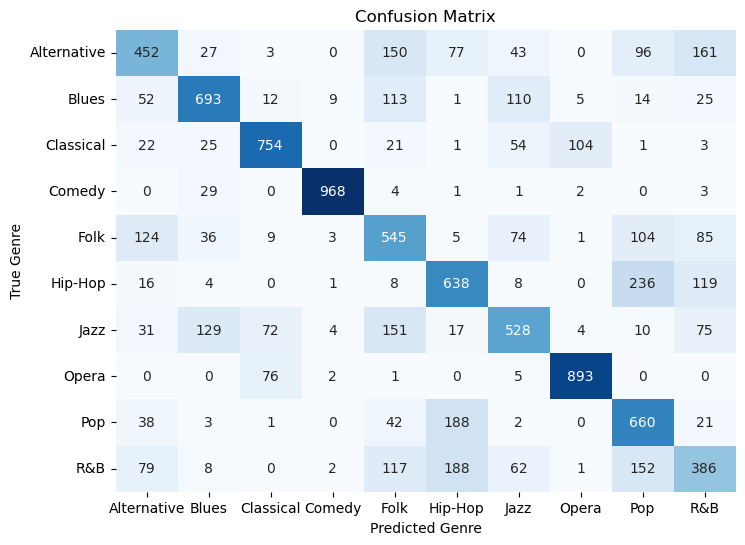

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.45      0.50      1009
           1       0.73      0.67      0.70      1034
           2       0.81      0.77      0.79       985
           3       0.98      0.96      0.97      1008
           4       0.47      0.55      0.51       986
           5       0.57      0.62      0.59      1030
           6       0.60      0.52      0.55      1021
           7       0.88      0.91      0.90       977
           8       0.52      0.69      0.59       955
           9       0.44      0.39      0.41       995

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



In [65]:
##GIven that the extreme gradient produced the best accuracy of all models:

#Plot the confusion matrix fo this ML odel
# Create a heatmap-style confusion matrix plot

# Calculate confusion matrix

genre_labels = label_encoder.classes_  ## the genre classes

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=genre_labels, yticklabels=genre_labels)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.title("Confusion Matrix")
plt.show()

#the classification report:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 7.3983
R-squared (R²): 0.1007062152887952


## Hyperparameter Tuning

In [68]:
#!pip install optuna

## Hypertuning with optuna fro XGB model: 

import optuna
from xgboost import XGBClassifier

def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 3, 7)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)
    
    xgb = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        eval_metric='mlogloss',
        random_state=42
    )
    
    score = cross_val_score(xgb, X_train_pca, y_train, cv=3, scoring='accuracy').mean()
    return score

# Run the optimization
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

best_trial = study_xgb.best_trial

# Printbest parameters and best score
print(f"Best Parameters for XGBoost: {best_trial.params}")
print(f"Best Cross-Validation Accuracy for XGBoost: {best_trial.value:.2f}")



# Testing Using the Test Data

The preprocessing steps that have been done for the training set will be done on the test set before predicting/ testing the models.
A separate part of the notebook has been  used to avoid confusion and possible data leakage.

In [72]:
df_test = pd.read_csv( 'testing-instances.csv')
df_test .head()

,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,Michael Haydn,"Lauft, ihr Hirten, allzugleich, MH 217 (Live)",5iGDehxYjg5YX025Mi2Iwd,28,0.969,0.395,531258,0.110,0.000381,A#,0.7940,-20.450,Major,0.0560,127.067,04-Apr,0.295
1,2,Tee Grizzley,Too Lit,1edknCYWzIaFbGX7YKfowe,54,0.165,0.739,-1,0.668,0.000000,G#,0.2200,-5.092,Major,0.2170,98.01,04-Apr,0.241
2,3,Jethro Tull,Hymn 43,4DM3zxFlei14ZOyKFtEx5p,38,0.081,0.491,196680,0.791,0.000007,G,0.4470,-8.801,Major,0.0360,?,04-Apr,0.880
3,4,Susannah McCorkle,Forty-Second Street,4Egb5xP6cniUx0kgZd5zLB,43,0.867,0.639,171027,0.172,0.000000,A#,0.0987,-16.296,Minor,0.0436,99.051,04-Apr,0.536
4,5,Willie Colón,Eso Se Baila Asi,67kJEhAjT5GtHGESOceau1,38,0.679,0.636,321120,0.576,0.000055,C,0.0702,-8.454,Major,0.0501,120.644,04-Apr,0.821


In [73]:
df_test['time_signature'] = df_test['time_signature'].str.replace(r'(\d+)-\w+', r'\1/4', regex=True)  ## fix the time signature format

# Check the result
df_test.head()

,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,Michael Haydn,"Lauft, ihr Hirten, allzugleich, MH 217 (Live)",5iGDehxYjg5YX025Mi2Iwd,28,0.969,0.395,531258,0.110,0.000381,A#,0.7940,-20.450,Major,0.0560,127.067,04/4,0.295
1,2,Tee Grizzley,Too Lit,1edknCYWzIaFbGX7YKfowe,54,0.165,0.739,-1,0.668,0.000000,G#,0.2200,-5.092,Major,0.2170,98.01,04/4,0.241
2,3,Jethro Tull,Hymn 43,4DM3zxFlei14ZOyKFtEx5p,38,0.081,0.491,196680,0.791,0.000007,G,0.4470,-8.801,Major,0.0360,?,04/4,0.880
3,4,Susannah McCorkle,Forty-Second Street,4Egb5xP6cniUx0kgZd5zLB,43,0.867,0.639,171027,0.172,0.000000,A#,0.0987,-16.296,Minor,0.0436,99.051,04/4,0.536
4,5,Willie Colón,Eso Se Baila Asi,67kJEhAjT5GtHGESOceau1,38,0.679,0.636,321120,0.576,0.000055,C,0.0702,-8.454,Major,0.0501,120.644,04/4,0.821


In [74]:
# imputation of tempo

df_test['tempo'] = pd.to_numeric(df_test['tempo'], errors='coerce') 

df_test['tempo'] = df_test['tempo'].fillna(df_test['tempo'].mean())

# Preprocessing and Feature Engineering

In [76]:
df_test['loudness_energy_ratio'] = df_test['loudness'] / df_test['energy']

##########  REMOVED ##############

####### log transformation for skewness in some features to tone down the effects of outliers as mentioned priorr 

df_test['instrumentalness_log'] = np.log1p(df_test['instrumentalness']) 

df_test['liveness_log'] = np.log1p(df_test['liveness']) 

df_test['speechiness_log'] = np.log1p(df_test['speechiness']) 

df_test['tempo_log'] = np.log1p(df_test['tempo']) 

############### REMoved ##################


df_test['artist_name_freq'] = df_test['artist_name'].map(df_test['artist_name'].value_counts()) 

In [79]:
## Drop the original features to prevent redundancy 

df_test.drop(columns = ['artist_name','energy', 
                    'loudness', 
                    'track_id',             ### Remove track id and track_name  these are high in uniqueness and less likly to explain the varianc in the genre
                    'track_name',
                    'duration_ms'], inplace = True)   # Remove duration_ms as noted from ANOVA,it score very poorly on F-test and least likely to explain variance in target variale

In [80]:
### Encode categorical features
categorical_columns = [ 'key', 'mode', 'time_signature']  

# One-hot encode categorical columns
df_test = pd.get_dummies(df_test, columns=categorical_columns, drop_first=True)
df_test = df_test.astype({col: int for col in df_test.select_dtypes(include=['bool']).columns})

In [81]:
## Separate features and the target variable

X_test = df_test

### Ensuring test data has the same columns as training data
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


### Scale

In [84]:
X_test_scaled = scaler.transform(X_test)

### Apply PCA 

In [86]:
##X_test_pca = pca.transform(X_test)    #Do not use PCA, it lowers accuracy 

## Apply ML Model

In [88]:
## XGB

y_test_pred = xgb.predict(X_test_scaled)


In [89]:
# Encode genre back to object datatype:

final_pred = label_encoder.inverse_transform(y_test_pred)
final_pred

array(['Opera', 'Hip-Hop', 'Blues', ..., 'Jazz', 'Pop', 'Folk'],
      dtype=object)

In [90]:
submit = pd.DataFrame( {'instance_id' : df_test ['instance_id'], 'genre' : final_pred})
submit.to_csv('kaggle_submission.csv', index = False)